# Limpeza de dados e estatística descritiva

Neste desafio colocaremos em prática alguns conceitos apresentado nas aulas. Para isso, usaremos o conjunto de dados [Prestação de contas eleitorais - 2020](https://dadosabertos.tse.jus.br/dataset/prestacao-de-contas-eleitorais-2020) disponível no Portal de Dados Abertos do Tribunal Superior Eleitoral.

Os dados também podem ser encontrados na pasta "Dados" deste repositório.

Preencha as lacunas abaixo para completar o desafio.

# Importe os pacotes necessários

In [106]:
import pandas as pd
import numpy as np

# Leia o arquivo "receitas_orgaos_partidarios_2020_NORTE.csv" que está na pasta dados desse repositório, usando o Pandas

Na aula `1.10 - Outliers e valores faltantes`, vimos como utilizar o método `replace` para substituir valores em certos colunas do nosso dataframe e trocar o texto (string) `#NULO#` pela representação padrão do Pandas para valores nulos.

Aqui, vamos utilizar um outro método, onde definimos quais strings serão considerados valores nulos já na importação do arquivo.

Edite as células abaixo e inclua:

* O nome do arquivo que queremos importar
* O separador utilizado
* Insira uma lista no parâmetro `na_values` que contenha o texto a ser ignorado.

Experimente rodar os comandos primeiro sem e depois com o parâmetro `na_values`, então, compare a diferença. Observe, por exemplo, o campo `CD_CNAE_DOADOR`.

In [107]:
df = pd.read_csv('../base_dados/receitas_orgaos_partidarios_2020_NORTE.csv',sep=';')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6052 entries, 0 to 6051
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   DT_GERACAO                   6052 non-null   object 
 1   HH_GERACAO                   6052 non-null   object 
 2   ANO_ELEICAO                  6052 non-null   int64  
 3   CD_TIPO_ELEICAO              6052 non-null   int64  
 4   NM_TIPO_ELEICAO              6052 non-null   object 
 5   TP_PRESTACAO_CONTAS          6052 non-null   object 
 6   DT_PRESTACAO_CONTAS          6052 non-null   object 
 7   SQ_PRESTADOR_CONTAS          6052 non-null   int64  
 8   CD_ESFERA_PARTIDARIA         6052 non-null   object 
 9   DS_ESFERA_PARTIDARIA         6052 non-null   object 
 10  SG_UF                        6052 non-null   object 
 11  CD_MUNICIPIO                 5043 non-null   float64
 12  NM_MUNICIPIO                 5043 non-null   object 
 13  NR_CNPJ_PRESTADOR_

In [108]:
df = pd.read_csv('../base_dados/receitas_orgaos_partidarios_2020_NORTE.csv',sep=';',na_values='#NULO#')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6052 entries, 0 to 6051
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   DT_GERACAO                   6052 non-null   object 
 1   HH_GERACAO                   6052 non-null   object 
 2   ANO_ELEICAO                  6052 non-null   int64  
 3   CD_TIPO_ELEICAO              6052 non-null   int64  
 4   NM_TIPO_ELEICAO              6052 non-null   object 
 5   TP_PRESTACAO_CONTAS          6052 non-null   object 
 6   DT_PRESTACAO_CONTAS          6052 non-null   object 
 7   SQ_PRESTADOR_CONTAS          6052 non-null   int64  
 8   CD_ESFERA_PARTIDARIA         6052 non-null   object 
 9   DS_ESFERA_PARTIDARIA         6052 non-null   object 
 10  SG_UF                        6052 non-null   object 
 11  CD_MUNICIPIO                 5043 non-null   float64
 12  NM_MUNICIPIO                 5043 non-null   object 
 13  NR_CNPJ_PRESTADOR_

# Filtre apenas os registros que sejam da prestação de contas final


In [109]:
# Primeiro vamos ver os valores únicos da coluna TP_PRESTACAO_CONTAS

df['TP_PRESTACAO_CONTAS'].unique()

array(['Final', 'Parcial', 'Relatório Financeiro',
       'Regularização da Omissão'], dtype=object)

In [110]:
# O resultado deste comando nos diz que quantas linhas e colunas temos antes do filtro
df.shape

(6052, 48)

In [111]:
# Preencha o campo os espaços abaixo com o nome da coluna e o valor desejado para nosso filtro
df_final = df[df['TP_PRESTACAO_CONTAS'] == 'Final'].copy()

In [112]:
# Rode o comando shape no novo dataframe criado e confira se o número de linhas foi reduzido

df_final.shape

(5912, 48)

## Qual foi a maior doação de pessoa física e pessoa jurídica em cada estado?

Vamos usar o método `value_counts` para não só listar cada valor único da coluna `CD_CNAE_DOADOR`, como também mostrar quantos registros temos em cada um.

In [120]:
# Preencha o nome da coluna abaixo

# Substituindo os vazios por -1
df_final['CD_CNAE_DOADOR'] = df_final.loc[:,'CD_CNAE_DOADOR'].replace(np.nan,-1)
df_final['TIPO_DOADOR'] = df_final.loc[:,'CD_CNAE_DOADOR']

# Contando cada tipo de doador
df_final['TIPO_DOADOR'].value_counts()

TIPO_DOADOR
 94928.0    2957
-1.0        2951
 47814.0       2
 59120.0       1
 85996.0       1
Name: count, dtype: int64

In [121]:
# Para ver os resultados em percentuais é fácil! Basta falarmos para o value_counts que queremos os resultados normalizados

df_final['TIPO_DOADOR'].value_counts(normalize=True)

TIPO_DOADOR
 94928.0    0.500169
-1.0        0.499154
 47814.0    0.000338
 59120.0    0.000169
 85996.0    0.000169
Name: proportion, dtype: float64

Se o doador for pessoa jurídica, temos seu respectivo código CNAE. Se for pessoa física, então temos o valor `-1`. 

Qual conclusão podemos tirar a respeito dos comandos acima?

Escreva um **comentário** na célula abaixo com a resposta.

In [122]:
# A quantidade de doações por pessoas físicas é quase igual, porém menor, que a quantidade de doações por pessao jurídica

Agora, vamos duplicar a coluna `CD_CNAE_DOADOR` e deixar esta nova coluna apenas com 2 categorias: física (representada pelo valor -1) ou jurídica (que vamos representar inicialmente com 1).

In [123]:
# Vamos criar uma nova coluna que seja uma cópia exata da coluna CD_CNAE_DOADOR
df_final.columns
# Já foi criada

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'TP_PRESTACAO_CONTAS', 'DT_PRESTACAO_CONTAS',
       'SQ_PRESTADOR_CONTAS', 'CD_ESFERA_PARTIDARIA', 'DS_ESFERA_PARTIDARIA',
       'SG_UF', 'CD_MUNICIPIO', 'NM_MUNICIPIO', 'NR_CNPJ_PRESTADOR_CONTA',
       'NR_PARTIDO', 'SG_PARTIDO', 'NM_PARTIDO', 'CD_FONTE_RECEITA',
       'DS_FONTE_RECEITA', 'CD_ORIGEM_RECEITA', 'DS_ORIGEM_RECEITA',
       'CD_NATUREZA_RECEITA', 'DS_NATUREZA_RECEITA', 'CD_ESPECIE_RECEITA',
       'DS_ESPECIE_RECEITA', 'CD_CNAE_DOADOR', 'DS_CNAE_DOADOR',
       'NR_CPF_CNPJ_DOADOR', 'NM_DOADOR', 'NM_DOADOR_RFB',
       'CD_ESFERA_PARTIDARIA_DOADOR', 'DS_ESFERA_PARTIDARIA_DOADOR',
       'SG_UF_DOADOR', 'CD_MUNICIPIO_DOADOR', 'NM_MUNICIPIO_DOADOR',
       'SQ_CANDIDATO_DOADOR', 'NR_CANDIDATO_DOADOR',
       'CD_CARGO_CANDIDATO_DOADOR', 'DS_CARGO_CANDIDATO_DOADOR',
       'NR_PARTIDO_DOADOR', 'SG_PARTIDO_DOADOR', 'NM_PARTIDO_DOADOR',
       'NR_RECIBO_DOACAO', 'NR_DOCUMENTO_DO

## Substituição condicional (conditional replacing)

Agora, vamos usar o método where do pacote NumPy (carinhosamente chamado de np abaixo).

Esta função recebe três parâmetros:

* Uma condição: no nosso caso, queremos que filtrar as coluna do CNAE onde os valores sejam -1
* Um valor: caso a condição acima seja verdadeira, qual valor deverá ser retornado?
* Outro valor: se a condição for falsa, então, qual outro valor deverá ser retornado?


In [124]:
df_final['TIPO_DOADOR'] = np.where(df_final['TIPO_DOADOR']== -1, 'fisica', 'juridica')
df_final['TIPO_DOADOR'].value_counts()

TIPO_DOADOR
juridica    2961
fisica      2951
Name: count, dtype: int64

## Agrupando (group by)

In [128]:
# Preencha abaixo primeiro uma lista com as 3 colunas que precisamos utilizar para responder à pergunta. E depois o nome das 2 colunas que precisamos agrupar.

df_final[['CD_CNAE_DOADOR','TIPO_DOADOR','VR_RECEITA']].groupby(by=['TIPO_DOADOR','CD_CNAE_DOADOR']).max()

VR_RECEITA
TIPO_DOADOR CD_CNAE_DOADOR           
fisica      -1.0               995,94
juridica     47814.0         19000,00
             59120.0             5,25
             85996.0         22700,00
             94928.0            99,30

In [130]:
# Para repetir o valor da coluna TIPO_DOADOR nas linhas, coloque o parâmetro as_index=False no método groupby do comando acima

df_final[['CD_CNAE_DOADOR','TIPO_DOADOR','VR_RECEITA']].groupby(by=['TIPO_DOADOR','CD_CNAE_DOADOR'],as_index=False).max()

,TIPO_DOADOR,CD_CNAE_DOADOR,VR_RECEITA
0,fisica,-1.0,"995,94"
1,juridica,47814.0,"19000,00"
2,juridica,59120.0,"5,25"
3,juridica,85996.0,"22700,00"
4,juridica,94928.0,"99,30"


## Qual o total de doações recebidas por partido?

In [131]:
df_final['VR_RECEITA'] = df_final['VR_RECEITA'].apply(lambda x : x.replace(',','.'))
df_final['VR_RECEITA'] = df_final['VR_RECEITA'].apply(pd.to_numeric)
df_final[['NM_PARTIDO','VR_RECEITA']].groupby(by='NM_PARTIDO').sum()

,VR_RECEITA
NM_PARTIDO,
AVANTE,498726.86
Cidadania,2219623.58
Democracia Cristã,579762.02
Democratas,2436863.08
Movimento Democrático Brasileiro,26787221.17
PROGRESSISTAS,21131024.67
Partido Comunista Brasileiro,5957.40
Partido Comunista do Brasil,828417.19
Partido Democrático Trabalhista,4233608.09


## Qual é o top 10?

Crie um novo dataframe com os 10 partidos com mais doações. Você precisa primeiro ordenar os resultados e depois selecionar apenas os 10 primeiros.



In [133]:
df_final[['VR_RECEITA','NM_PARTIDO']].groupby(by='NM_PARTIDO').sum().sort_values(by='VR_RECEITA',ascending=False).head(10)

,VR_RECEITA
NM_PARTIDO,
Partido Social Democrático,44622192.18
Movimento Democrático Brasileiro,26787221.17
PROGRESSISTAS,21131024.67
Partido Social Liberal,14133814.44
Partido dos Trabalhadores,11252216.64
Podemos,10923235.59
Solidariedade,10855671.17
Rede Sustentabilidade,10416744.67
REPUBLICANOS,9731257.47


# Vamos visualizar os resultados?
Na aula, nós vimos como usar o matplotlib para gerar gráficos. Agora, vamos descobrir uma nova forma de fazer o mesmo usando um método nativo Pandas. Experimente colocar `.plot(kind='barh')` após a consulta ou dataframe anterior.

Com este comando, podemos produzir um gráfico (plot) do tipo (kind) de barras horizontais (barh).

<Axes: ylabel='NM_PARTIDO'>

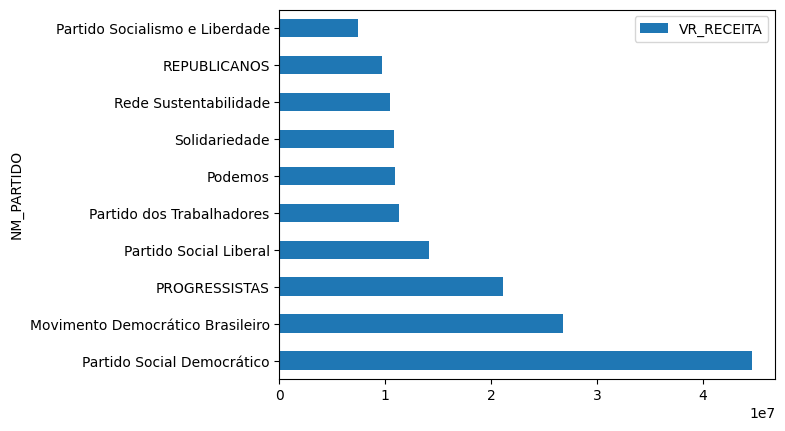

In [134]:
df_final[['VR_RECEITA','NM_PARTIDO']].groupby(by='NM_PARTIDO').sum().sort_values(by='VR_RECEITA',ascending=False).head(10).plot(kind='barh')

## Qual o valor médio das doações por tipo de doador?

Agora é sua vez! A partir dos comandos anteriores, faça uma nova consulta para descobrir a mediana de acordo com o tipo de doador.

In [142]:
df_final[['CD_CNAE_DOADOR','TIPO_DOADOR','VR_RECEITA']].groupby(by=['TIPO_DOADOR','CD_CNAE_DOADOR'],as_index=False).median()

,TIPO_DOADOR,CD_CNAE_DOADOR,VR_RECEITA
0,fisica,-1.0,800.00
1,juridica,47814.0,17900.00
2,juridica,59120.0,5.25
3,juridica,85996.0,22700.00
4,juridica,94928.0,2000.00


## Qual o valor mais alto de doação por tipo de doador?

In [143]:
df_final[['CD_CNAE_DOADOR','TIPO_DOADOR','VR_RECEITA']].groupby(by=['TIPO_DOADOR','CD_CNAE_DOADOR'],as_index=False).max()

,TIPO_DOADOR,CD_CNAE_DOADOR,VR_RECEITA
0,fisica,-1.0,200000.00
1,juridica,47814.0,19000.00
2,juridica,59120.0,5.25
3,juridica,85996.0,22700.00
4,juridica,94928.0,6900000.00


## Crie uma tabela com valor máximo, mínimo e a mediana, por estado e tipo de doador

In [156]:

df_stat = df_final[['TIPO_DOADOR','VR_RECEITA','SG_UF']].groupby(by=['TIPO_DOADOR','SG_UF'],as_index=False).agg({'VR_RECEITA':[min,max]})
df_stat

TIPO_DOADOR SG_UF VR_RECEITA           
                            min        max
0       fisica    AC       4.80    40560.0
1       fisica    AM       2.00    35000.0
2       fisica    AP      49.88    12000.0
3       fisica    PA       0.10   200000.0
4       fisica    RO       1.20   110000.0
5       fisica    RR      23.74    30000.0
6       fisica    TO       0.01    30000.0
7     juridica    AC      10.00  4900000.0
8     juridica    AM       0.04  6900000.0
9     juridica    AP       0.55  4900000.0
10    juridica    PA       0.10  4400000.0
11    juridica    RO       0.40  2900000.0
12    juridica    RR      12.50  2900000.0
13    juridica    TO       0.05  4900000.0

# Entreviste você mesmo

Escreva abaixo pelo menos outras três perguntas que podem ser feitas à base de dados. Escreva a pergunta como um comentário acima do código com a consulta em Python.

In [164]:
# Quanto cada estado arrecadou em doações no total, por tipo de doador

df_final[['VR_RECEITA','SG_UF','TIPO_DOADOR']].groupby(by=['SG_UF','TIPO_DOADOR']).sum()

VR_RECEITA
SG_UF TIPO_DOADOR             
AC    fisica         516688.26
      juridica     22585542.95
AM    fisica         491585.92
      juridica     35625509.00
AP    fisica          82687.88
      juridica     33073470.04
PA    fisica        4532569.87
      juridica     42454506.85
RO    fisica         815877.84
      juridica     22978320.93
RR    fisica         170414.95
      juridica     20868194.74
TO    fisica         414676.35
      juridica     24682986.39

In [222]:
# Organize os partidos pela soma de doações de cada estado
df_partidos_receita = df_final[['NM_PARTIDO','VR_RECEITA','SG_UF']].groupby(by=['NM_PARTIDO','SG_UF'],as_index=False).sum()
df_partidos_receita

,NM_PARTIDO,SG_UF,VR_RECEITA
0,AVANTE,AC,216415.00
1,AVANTE,AM,80303.30
2,AVANTE,AP,64901.20
3,AVANTE,PA,124522.81
4,AVANTE,RO,8024.10
...,...,...,...
175,Solidariedade,PA,1030441.00
176,Solidariedade,RO,1798619.44
177,Solidariedade,RR,1527027.11
178,Solidariedade,TO,2877113.62


<Axes: xlabel='SG_UF'>

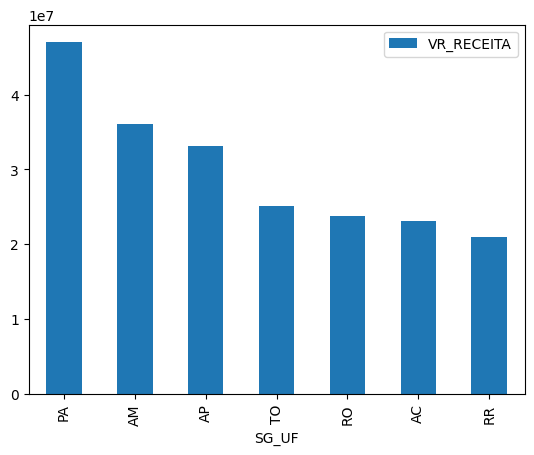

In [227]:
# Plote a distribuição de doações por estado

df_partidos_receita[['SG_UF','VR_RECEITA']].groupby(by='SG_UF').sum().sort_values(by='VR_RECEITA',ascending=False).plot(kind='bar')